# An example of a polar projection plot

If you now try to do some plots (e.g. plot, scatter, bar) in a polar projection, you’ll see that everything is transformed but a few elements. More precisely, the shape of markers is not transformed (a disc marker will remains a disc visually),
the text is not transformed (such that it remains readable) and the width
of lines is kept constant. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import pandas as pd

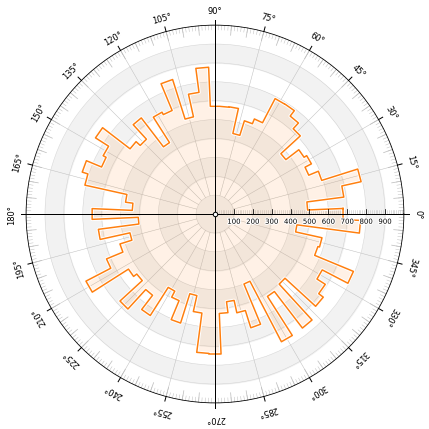

In [2]:
# Setup
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, projection="polar", frameon=True)
ax.set_thetalim(0, 2 * np.pi)
ax.set_rlim(0, 1000)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks(np.linspace(100, 1000, 10))
ax.set_yticklabels([])
ax.tick_params("both", grid_alpha=0.50, grid_zorder=-10, grid_linewidth=0.5)


# Theta ticks
radius = ax.get_rmax()
length = 0.025 * radius
for i in range(360):
    angle = np.pi * i / 180
    ax.plot(
        [angle, angle],
        [radius, radius - length],
        linewidth=0.50,
        color="0.75",
        clip_on=False,
    )
for i in range(0, 360, 5):
    angle = np.pi * i / 180
    ax.plot(
        [angle, angle],
        [radius, radius - 2 * length],
        linewidth=0.75,
        color="0.75",
        clip_on=False,
    )
for i in range(0, 360, 15):
    angle = np.pi * i / 180
    ax.plot([angle, angle], [radius, 100], linewidth=0.5, color="0.75")
    ax.plot(
        [angle, angle],
        [radius + length, radius],
        zorder=500,
        linewidth=1.0,
        color="0.00",
        clip_on=False,
    )
    ax.text(
        angle,
        radius + 4 * length,
        "%d°" % i,
        zorder=500,
        rotation=i - 90,
        rotation_mode="anchor",
        va="top",
        ha="center",
        size="small",
        color="black",
    )
for i in range(0, 360, 90):
    angle = np.pi * i / 180
    ax.plot([angle, angle], [radius, 0], zorder=500, linewidth=1.00, color="0.0")


# Radius ticks
def polar_to_cartesian(theta, radius):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y])


def cartesian_to_polar(x, y):
    radius = np.sqrt(x ** 2 + y ** 2)
    theta = np.arctan2(y, x)
    return np.array([theta, radius])


for i in range(0, 1000, 10):
    P0 = 0, i
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, 0.75 * length]))
    ax.plot([P0[0], P1[0]], [P0[1], P1[1]], linewidth=0.50, color="0.75")

for i in range(100, 1000, 100):
    P0 = 0, i
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, +1.0 * length]))
    ax.plot([P0[0], P1[0]], [P0[1], P1[1]], zorder=500, linewidth=0.75, color="0.0")
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, -1.0 * length]))
    text = ax.text(
        P1[0],
        P1[1],
        "%d" % i,
        zorder=500,
        va="top",
        ha="center",
        size="x-small",
        color="black",
    )
    text.set_path_effects(
        [path_effects.Stroke(linewidth=2, foreground="white"), path_effects.Normal()]
    )

# Circular bands
n = 1000
T = np.linspace(0, 2 * np.pi, n)
color = "0.95"
ax.fill_between(T, 0, 100, color=color, zorder=-50)
ax.fill_between(T, 200, 300, color=color, zorder=-50)
ax.fill_between(T, 400, 500, color=color, zorder=-50)
ax.fill_between(T, 600, 700, color=color, zorder=-50)
ax.fill_between(T, 800, 900, color=color, zorder=-50)
ax.scatter([0], [0], 20, facecolor="white", edgecolor="black", zorder=1000)


# Actual plot

## With synthetic data
np.random.seed(123)
n = 145
T = 2 * np.pi / n + np.linspace(0, 2 * np.pi, n)
T[1::2] = T[0:-1:2]
R = np.random.uniform(400, 800, n)
R[-1] = R[0]
R[1:-1:2] = R[2::2]
ax.fill(T, R, color="C1", zorder=150, alpha=0.1)
ax.plot(T, R, color="white", zorder=200, linewidth=3.5)
ax.plot(T, R, color="C1", zorder=250, linewidth=1.5)

fig.tight_layout()

If you look more closely at the radial axis with ticks ranging from 100 to 900, you can observe that the ticks have the same vertical size. It is indeed an *anomaly* I introduced deliberately for purely aesthetic reasons. If I had specified these ticks using a plot command, the length of each tick would correspond to a difference of angle (for the vertical size) and they would become taller and taller as we move away from the center. To have regulars ticks, we thus have to do some computations using the inverse transform (remember, a projection is a forward and an inverse transform).

## Using this template for meteorology data

Wind direction data every hour for the last year in Basil, Switzerland

In [3]:
wind_data = pd.read_csv('../data/wind_data_basel_Switzerland.csv',
                        header=10)
wind_data.head()

,timestamp,Basel Wind Speed [900 mb],Basel Wind Direction [900 mb],Basel Wind Speed [500 mb],Basel Wind Direction [500 mb]
0,20200901T0000,10.464797,319.18494,12.979984,3.179825
1,20200901T0100,9.693296,301.32870,14.058450,357.064330
2,20200901T0200,8.707238,277.12500,18.643690,349.992000
3,20200901T0300,9.826088,278.42697,21.659916,338.552280
4,20200901T0400,12.682018,276.51980,31.722921,350.858340


In [4]:
Nhours_per_bin, direction_deg_binedge = np.histogram(wind_data['Basel Wind Direction [900 mb]'],
                                                     bins=100)
step_edges = np.empty((len(direction_deg_binedge)-1)*2)
step_edges[:-1:2] = direction_deg_binedge[:-1]
step_edges[1::2] = direction_deg_binedge[1:]

step_heights = np.empty((len(direction_deg_binedge)-1)*2)
step_heights[:-1:2] = Nhours_per_bin
step_heights[1::2] = Nhours_per_bin

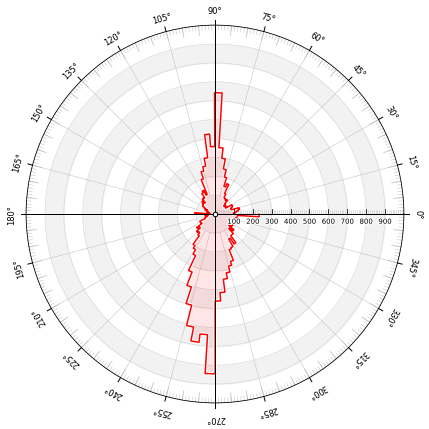

In [5]:
# Setup
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, projection="polar", frameon=True)
ax.set_thetalim(0, 2 * np.pi)
ax.set_rlim(0, 1000)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks(np.linspace(100, 1000, 10))
ax.set_yticklabels([])
ax.tick_params("both", grid_alpha=0.50, grid_zorder=-10, grid_linewidth=0.5)


# Theta ticks
radius = ax.get_rmax()
length = 0.025 * radius
for i in range(360):
    angle = np.pi * i / 180
    ax.plot(
        [angle, angle],
        [radius, radius - length],
        linewidth=0.50,
        color="0.75",
        clip_on=False,
    )
for i in range(0, 360, 5):
    angle = np.pi * i / 180
    ax.plot(
        [angle, angle],
        [radius, radius - 2 * length],
        linewidth=0.75,
        color="0.75",
        clip_on=False,
    )
for i in range(0, 360, 15):
    angle = np.pi * i / 180
    ax.plot([angle, angle], [radius, 100], linewidth=0.5, color="0.75")
    ax.plot(
        [angle, angle],
        [radius + length, radius],
        zorder=500,
        linewidth=1.0,
        color="0.00",
        clip_on=False,
    )
    ax.text(
        angle,
        radius + 4 * length,
        "%d°" % i,
        zorder=500,
        rotation=i - 90,
        rotation_mode="anchor",
        va="top",
        ha="center",
        size="small",
        color="black",
    )
for i in range(0, 360, 90):
    angle = np.pi * i / 180
    ax.plot([angle, angle], [radius, 0], zorder=500, linewidth=1.00, color="0.0")


# Radius ticks
def polar_to_cartesian(theta, radius):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y])


def cartesian_to_polar(x, y):
    radius = np.sqrt(x ** 2 + y ** 2)
    theta = np.arctan2(y, x)
    return np.array([theta, radius])


for i in range(0, 1000, 10):
    P0 = 0, i
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, 0.75 * length]))
    ax.plot([P0[0], P1[0]], [P0[1], P1[1]], linewidth=0.50, color="0.75")

for i in range(100, 1000, 100):
    P0 = 0, i
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, +1.0 * length]))
    ax.plot([P0[0], P1[0]], [P0[1], P1[1]], zorder=500, linewidth=0.75, color="0.0")
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, -1.0 * length]))
    text = ax.text(
        P1[0],
        P1[1],
        "%d" % i,
        zorder=500,
        va="top",
        ha="center",
        size="x-small",
        color="black",
    )
    text.set_path_effects(
        [path_effects.Stroke(linewidth=2, foreground="white"), path_effects.Normal()]
    )

# Circular bands
n = 1000
T = np.linspace(0, 2 * np.pi, n)
color = "0.95"
ax.fill_between(T, 0, 100, color=color, zorder=-50)
ax.fill_between(T, 200, 300, color=color, zorder=-50)
ax.fill_between(T, 400, 500, color=color, zorder=-50)
ax.fill_between(T, 600, 700, color=color, zorder=-50)
ax.fill_between(T, 800, 900, color=color, zorder=-50)
ax.scatter([0], [0], 20, facecolor="white", edgecolor="black", zorder=1000)


# Actual plot

## With wind data
ax.fill(np.deg2rad(step_edges), step_heights, color="r", zorder=150, alpha=0.1)
ax.plot(np.deg2rad(step_edges), step_heights, color="white", zorder=200, linewidth=3.5)
ax.plot(np.deg2rad(step_edges), step_heights, color="r", zorder=250, linewidth=1.5)

fig.tight_layout()